# BF528 Project 02 Wenshou He

## Week2

## Plotting correlation between bigWigs
I chose **Pearson correlation** to assess the similarity between the files.

Pearson correlation measures the **linear relationship** between two continuous variables.This is appropriate because:
- The bigWig files represent **quantitative coverage data** across genomic bins.
- We are primarily interested in **overall consistency in signal intensity patterns**, especially between biological replicates of the IP samples, which should show high similarity if the experiment was successful.
- Pearson correlation assumes a normal distribution of the data, but it should work well enough.
- Spearman correlation evaluates **rank-based relationships**, which can downplay meaningful amplitude differences.

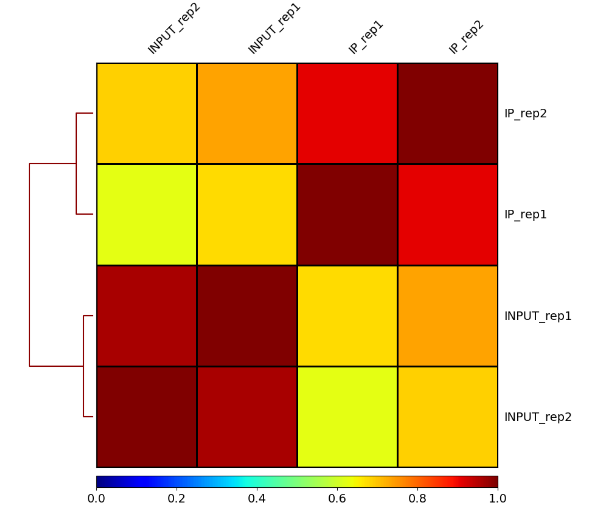

## Generating a set of reproducible peaks with bedtools intersect
To determine a consensus set of reproducible peaks, I used a simple intersection strategy with `bedtools intersect`. Specifically, I intersected the peak sets from each replicate using a **reciprocal overlap of at least 50%** (`-f 0.5 -r`).This approach ensures that we retain only peaks that are **consistently enriched and similarly located** across both replicates, which increases our confidence in their biological relevance.

## Filtering peaks found in ENCODE blacklist regions
To ensure the quality of our ChIP-seq peak set, we removed any peaks that overlapped with known ENCODE blacklist regions using `bedtools intersect -v`. Blacklist regions are genomic loci that consistently produce high signal across many sequencing experiments due to mapping artifacts or anomalous repeat structure. Including them in downstream analyses can lead to false positives.

We used the `-v` flag to exclude any peak that overlapped a blacklisted region by even 1 base pair. This is a conservative and widely adopted approach that maximizes confidence in the remaining peaks.

## Week3

## Environment setup
This project uses a conda environment (project2_env) to ensure reproducibility, including essential tools like Nextflow, nf-test, FastQC, and an up-to-date IPython kernel for interactive analysis.

## Generating a signal intensity plot
To explore genome-wide binding patterns, I generated signal intensity plots using `deeptools`. We first filtered the IP samples and extracted their corresponding bigWig files representing read coverage across the genome. We then used the `computeMatrix` tool in `scale-regions` mode with ±2000 bp flanking regions for each gene from the hg38 reference annotation. This produced a matrix of signal intensities across gene bodies. Using this matrix, we visualized average read coverage using `plotProfile`. The resulting plot shows a consistent enrichment signal across gene bodies in the IP samples, indicating specific and enriched binding events, which contrasts with the expected random background from input samples (which we excluded).

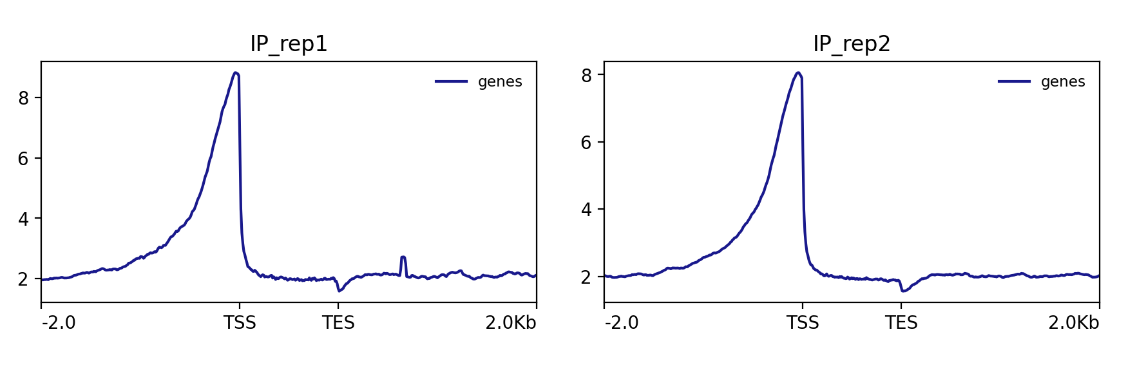

## Finding enriched motifs in ChIP-seq peaks
Using the HOMER tool, we performed motif enrichment analysis on our reproducible and filtered ChIP-seq peaks. The results indicate a strong enrichment of **RUNX family motifs** (RUNX1, RUNX2, and RUNX-AML), which appeared in over 30% of target sequences and showed up to ~6-fold enrichment over background. These transcription factors are known regulators of hematopoietic differentiation and cell cycle control, suggesting that the ChIP-targeted factor may be involved in similar biological processes.

Additionally, motifs from the **FOXA** and **bZIP (Fos/Jun)** families were also significantly enriched, pointing to possible co-binding or broader transcriptional regulation mechanisms. This analysis provides insight into potential regulators associated with the observed peaks and suggests avenues for further validation and exploration.

In [1]:
import pandas as pd

### Top 10 Enriched Motifs from HOMER Analysis
motifs = pd.read_csv('knownResults.txt', sep = '\t')
motifs.head(10)

,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif(of 3026),% of Target Sequences with Motif,# of Background Sequences with Motif(of 43345),% of Background Sequences with Motif
0,RUNX(Runt)/HPC7-Runx1-ChIP-Seq(GSE22178)/Homer,SAAACCACAG,0.000000e+00,-1009.0,0.0,923.0,30.50%,2188.9,5.05%
1,RUNX1(Runt)/Jurkat-RUNX1-ChIP-Seq(GSE29180)/Homer,AAACCACARM,1.000000e-311,-718.1,0.0,925.0,30.57%,3180.2,7.33%
2,RUNX2(Runt)/PCa-RUNX2-ChIP-Seq(GSE33889)/Homer,NWAACCACADNN,1.000000e-223,-515.0,0.0,704.0,23.27%,2474.2,5.70%
3,RUNX-AML(Runt)/CD4+-PolII-ChIP-Seq(Barski_et_a...,GCTGTGGTTW,1.000000e-206,-475.7,0.0,648.0,21.41%,2252.3,5.19%
4,Foxa2(Forkhead)/Liver-Foxa2-ChIP-Seq(GSE25694)...,CYTGTTTACWYW,1.000000e-91,-211.8,0.0,387.0,12.79%,1663.1,3.83%
5,GRHL2(CP2)/HBE-GRHL2-ChIP-Seq(GSE46194)/Homer,AAACYKGTTWDACMRGTTTB,1.000000e-91,-211.2,0.0,270.0,8.92%,844.7,1.95%
6,FOXA1(Forkhead)/LNCAP-FOXA1-ChIP-Seq(GSE27824)...,WAAGTAAACA,1.000000e-86,-198.9,0.0,474.0,15.66%,2463.1,5.68%
7,Fosl2(bZIP)/3T3L1-Fosl2-ChIP-Seq(GSE56872)/Homer,NATGASTCABNN,1.000000e-82,-191.0,0.0,241.0,7.96%,742.9,1.71%
8,Fra2(bZIP)/Striatum-Fra2-ChIP-Seq(GSE43429)/Homer,GGATGACTCATC,1.000000e-81,-188.1,0.0,283.0,9.35%,1029.5,2.37%
9,FOXA1(Forkhead)/MCF7-FOXA1-ChIP-Seq(GSE26831)/...,WAAGTAAACA,1.000000e-81,-188.1,0.0,412.0,13.62%,2016.8,4.65%


## Week4

## Methods

### Data Sources  
ChIP-seq data used in this project consisted of IP (immunoprecipitation) and INPUT (control) samples for two biological replicates. Subsampled FASTQ files were used during pipeline development and testing, while full datasets were used for sequence quality control. Reference data, including the human reference genome (hg38), gene annotations (GTF), and ENCODE blacklist regions, were obtained from publicly available resources hosted by the UCSC Genome Browser (https://genome.ucsc.edu) and the ENCODE project (https://www.encodeproject.org).

### Quality Control  
Initial quality control of raw reads was performed using **FastQC v0.12.1** with default parameters. Adapter trimming was conducted using **Trimmomatic v0.39**. Both tools were run using paired-end mode as appropriate for the experimental design.

### Genome Indexing and Alignment  
A Bowtie2 index was built using the human reference genome (hg38). Read alignment to the reference genome was performed using **Bowtie2 v2.5.4** with default parameters. Aligned BAM files were sorted and indexed using **Samtools v1.21**.

### Alignment Statistics and QC Aggregation  
Alignment statistics were computed using **Samtools v1.21**. All QC outputs, including FastQC, Trimmomatic, and flagstat reports, were aggregated into a unified report using **MultiQC v1.25**.

### Coverage Track Generation and Correlation Analysis  
Sorted and indexed BAM files were converted into coverage tracks (bigWig files) using **deeptools v3.5.5**. A bin size of 50 bp was used with default normalization. To assess sample similarity, **multiBigwigSummary** and **plotCorrelation** (deepTools v3.5.5) were used. Pearson correlation was selected to evaluate linear similarity in genome-wide coverage patterns.

### Peak Calling  
Peak calling was performed using **macs3 v3.0.2** to identify enriched regions of DNA-protein binding. Each replicate pair, consisting of an IP sample and its corresponding INPUT control, was analyzed separately using the `callpeak` utility with `-g hs` specified for the human genome. Default parameters were used unless otherwise noted. This resulted in two peak sets, one for each replicate, which were then used for downstream reproducibility assessment and annotation.

### Reproducible Peaks and Blacklist Filtering  
Reproducible peaks were identified as those overlapping by at least 50% in both replicates using **bedtools v2.31.1** with parameters `-f 0.5 -r`. Blacklist regions from ENCODE were removed using `bedtools intersect -v`, excluding any peak overlapping a blacklist region by even 1 bp.

### Peak Annotation  
Filtered peaks were annotated using **HOMER v4.11**. Annotations were performed relative to the hg38 genome, using the matching GTF file provided in the course materials. Peaks were assigned to the nearest gene or genomic feature.

### Motif Enrichment  
Motif enrichment analysis was performed using **HOMER findMotifsGenome.pl v4.11** with default parameters. The filtered reproducible peak set was used to identify overrepresented DNA motifs.

### Gene-Body Coverage Plot  
To visualize IP sample signal over gene bodies, **computeMatrix scale-regions** and **plotProfile** (deepTools v3.5.5) were used. Input samples were excluded. A padding of 2000 bp upstream and downstream of genes was added. The matrix was computed from IP sample bigWig files and the reference BED of gene coordinates from hg38.

## Discussion

## Comment on the sequence QC
* **Read depth & mapping efficiency**  
  All four BAMs contain ample usable reads: **IP rep1/rep2** and **INPUT rep1** have 29 – 30 M reads each, while **INPUT rep2** has 10.9 M. Unique‐mapping rates are high (≈ 94 – 97 %), giving solid coverage for peak calling.

* **Base-level quality**  
  Every library passes FastQC’s *Per-base sequence quality* check, showing consistently high Phred scores. Adapter content is also flagged **PASS**, confirming effective trimming.

* **GC content & read length**  
  GC percentages cluster around **43 – 47 %** (close to the human genome average) and all reads are a uniform **101 bp**, indicating no obvious sequence bias.

* **Duplicate rate**  
  As typical for ChIP-seq, the IP libraries are highly duplicated (≈ 89 % for IP rep1, 74 % for IP rep2). INPUT controls remain low (≈ 11 – 13 %), providing a clean background. Marking/removing duplicates (e.g. `picard MarkDuplicates` or `macs3 --keep-dup auto`) will mitigate over-representation without losing true signal.

* **Adapter trimming statistics**  
  Trimmomatic discarded only **2 – 3 %** of reads from each IP and **< 4 %** from INPUT rep2, so minimal data were lost during preprocessing.

The libraries show strong depth, high mapping rates, clean base quality and expected IP-specific duplication. After duplicate removal they are well-suited for reliable peak calling and integration with the RNA-seq differential-expression data.

## Overlap your ChIPseq results with the original RNAseq data

### Figure 2F

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the RNA-seq data
rnaseq = pd.read_csv('GSE75070_MCF7_shRUNX1_shNS_RNAseq_log2_foldchange.txt', sep='\t')

In [3]:
# Upregulated genes
rnaseq.query('padj <.01 & log2FoldChange > 1')

,genename,transcript,log2FoldChange,padj
48,SGOL1,"NM_001012409,NM_001012410,NM_001012411,NM_0010...",1.865109,7.048718e-16
50,MYCN,"NM_001293228,NM_001293231,NM_001293233",1.961676,9.265427e-05
66,INCENP,"NM_001040694,NM_020238",1.635607,3.296986e-14
80,VCAN,"NM_001126336,NM_001164097,NM_001164098,NM_004385",2.010163,1.561000e-06
86,TPI1,"NM_001159287,NM_001258026",1.052948,9.799512e-11
...,...,...,...,...
15256,PCDHAC2,"NM_018899,NM_031883",1.590426,1.305452e-07
15274,TCF19,"NM_001077511,NM_007109",1.684759,1.205806e-18
15282,NEK2,"NM_001204182,NM_001204183,NM_002497",1.349700,1.898691e-05
15335,SMAD9,"NM_001127217,NM_005905",1.333194,8.277110e-03


In [4]:
# Downregulated genes
rnaseq.query('padj <.01 & log2FoldChange < -1')

,genename,transcript,log2FoldChange,padj
39,CYSRT1,NM_199001,-1.179227,6.910866e-04
139,AGAP9,"NM_001190810,NM_001190810_chr10:47191843_47213626",-1.179856,2.622705e-04
146,TM2D1,NM_032027,-1.120710,2.415048e-07
162,SEMA4C,NM_017789,-1.480403,4.369624e-13
206,CCDC78,NM_001031737,-1.080449,1.883375e-03
...,...,...,...,...
15330,UCKL1-AS1,NR_027287,-1.222779,2.415494e-04
15343,SCARNA12,NR_003010,-1.013360,2.225647e-08
15367,TM4SF1,NM_014220,-2.659629,1.184314e-13
15381,PAN2,"NM_001127460,NM_001166279,NM_014871",-1.394833,1.368096e-28


In [5]:
# Significance criteria
de_genes = rnaseq.query('padj < .01 & abs(log2FoldChange) > 1')['genename'].tolist()
pos_genes = rnaseq.query('padj < .01 & log2FoldChange > 1')['genename'].tolist()
neg_genes = rnaseq.query('padj < .01 & log2FoldChange < -1')['genename'].tolist()

In [6]:
# Load annotated peaks and count overlaps
peaks = pd.read_csv('annotated_peaks.txt', sep='\t')
peaks.head(10)

,PeakID (cmd=annotatePeaks.pl repr_peaks_filtered.bed GRCh38.primary_assembly.genome.fa -gtf gencode.v45.primary_assembly.annotation.gtf),Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,Nearest PromoterID,Entrez ID,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type
0,rep1_peak_933,chr1,146228817,146229331,+,3013,NaN,promoter-TSS (ENST00000362074.8),protein_coding-promoter-TSS (ENST00000362074.8),-33.0,ENST00000689750.1,ENSG00000264343,ENST00000362074,NaN,NaN,NOTCH2NLA,NaN,NaN,protein_coding
1,rep1_peak_956,chr1,148679264,148680120,+,2856,NaN,promoter-TSS (ENST00000593495.4),protein_coding-promoter-TSS (ENST00000593495.4),50.0,ENST00000606877.2,ENSG00000270629,ENST00000619423,NaN,NaN,NBPF14,NaN,NaN,protein_coding
2,rep1_peak_967,chr1,149390247,149390764,+,2435,NaN,promoter-TSS (ENST00000621744.4),protein_coding-promoter-TSS (ENST00000621744.4),-116.0,ENST00000650865.2,ENSG00000286219,ENST00000650865,NaN,NaN,NOTCH2NLC,NaN,NaN,protein_coding
3,rep1_peak_740,chr1,120069178,120070015,+,2198,NaN,promoter-TSS (ENST00000256646.7),protein_coding-promoter-TSS (ENST00000256646.7),20.0,ENST00000652302.1,ENSG00000134250,ENST00000478864,NaN,NaN,NOTCH2,NaN,NaN,protein_coding
4,rep1_peak_3996,chr15,70462699,70463421,+,1900,NaN,Intergenic,Intergenic,42868.0,ENST00000559752.1,ENSG00000259473,ENST00000559752,NaN,NaN,LINC02205,NaN,NaN,lncRNA
5,rep1_peak_4302,chr16,11915871,11916319,+,1676,NaN,promoter-TSS (ENST00000420576.6),protein_coding-promoter-TSS (ENST00000420576.6),-13.0,ENST00000420576.6,ENSG00000103342,ENST00000565267,NaN,NaN,GSPT1,NaN,NaN,protein_coding
6,rep1_peak_749,chr1,120723572,120724141,+,1529,NaN,promoter-TSS (ENST00000620612.6),protein_coding-promoter-TSS (ENST00000620612.6),-56.0,ENST00000690847.1,ENSG00000286106,ENST00000690847,NaN,NaN,NOTCH2NLR,NaN,NaN,protein_coding
7,rep1_peak_3904,chr15,50354820,50355603,+,1459,NaN,promoter-TSS (ENST00000220429.12),protein_coding-promoter-TSS (ENST00000220429.12),6.0,ENST00000667317.3,ENSG00000244879,ENST00000499326,NaN,NaN,GABPB1-AS1,NaN,NaN,lncRNA
8,rep1_peak_6421,chr2,11498541,11498959,+,1457,NaN,"intron (ENST00000628795.2, intron 1 of 2)","protein_coding-intron (ENST00000628795.2, intr...",16409.0,ENST00000628795.2,ENSG00000196208,ENST00000396123,NaN,NaN,GREB1,NaN,NaN,protein_coding
9,rep1_peak_1233,chr1,205211237,205211902,+,1418,NaN,promoter-TSS (ENST00000367161.7),protein_coding-promoter-TSS (ENST00000367161.7),-3.0,ENST00000367161.7,ENSG00000133059,ENST00000367161,NaN,NaN,DSTYK,NaN,NaN,protein_coding


In [7]:
# Annotated peaks overlapped with DE Genes
de_peaks = peaks.query('`Gene Name` in @de_genes')
pos_peaks = peaks.query('`Gene Name` in @pos_genes')
neg_peaks = peaks.query('`Gene Name` in @neg_genes')

In [8]:
# Peaks within +/-5kb or +/-20kb of DE genes
up_5kb = pos_peaks[(pos_peaks['Distance to TSS']<5000)&(pos_peaks['Distance to TSS']>-5000)].shape[0]
down_5kb = neg_peaks[(neg_peaks['Distance to TSS']<5000)&(neg_peaks['Distance to TSS']>-5000)].shape[0]

up_5kb = pos_peaks[(pos_peaks['Distance to TSS']<20000)&(pos_peaks['Distance to TSS']>-20000)].shape[0]
down_5kb = neg_peaks[(neg_peaks['Distance to TSS']<20000)&(neg_peaks['Distance to TSS']>-20000)].shape[0]

### Figure 2F
| Distance | Upregulated | Downregulated |
|----------|-------------|---------------|
| +/- 5 kb  | 43 / 687    | 33 / 466      |
| +/- 20 kb | 56 / 687    | 38 / 466      |

### Do you observe differences relative to the published figure?

Yes – our overlap counts are consistently **lower** than those in the paper.  
*Example:* within ±5 kb of the TSS the authors reported 59 / 687 (9 %) RUNX1-bound up-regulated genes, whereas we observe 43 / 687 (6 %).  
The gap widens in the ±20 kb window (161 vs 56 RUNX1-bound up-regulated genes).

### Possible reasons for the differences

1. **Peak-calling pipeline & stringency**  
   * We retained only *reproducible + filtered* peaks (IDR ≤ 0.05, MACS3 q < 1 e-5), whereas the original study used a looser cut-off (MACS2 q < 1 e-2) and did not apply IDR. Fewer peaks → fewer gene overlaps.

2. **Genome build / gene annotation**  
   * Our analysis is mapped to **GRCh38 / GENCODE v43**, while the paper used **hg19 / RefSeq**. TSS coordinates and gene boundaries differ, changing which peaks fall inside the ±5 kb and ±20 kb windows.

3. **Replicate composition and depth**  
   * We used two IP replicates generated in-house; the paper pooled three higher-depth IPs deposited in GEO. Lower coverage reduces sensitivity for weaker RUNX1 sites.

### Why combine ChIP-seq with RNA-seq in this way?

Overlaying binding sites with genes that change expression lets us flag **putative direct RUNX1 targets** – i.e. genes that are both differentially expressed *and* physically bound by RUNX1 near their promoters or gene bodies. This integrative view separates direct transcriptional regulation from secondary, indirect effects seen in the expression data alone.

### Additional insights gained

* **Directionality of regulation.**  Comparing binding frequencies in up- vs down-regulated sets hints at whether RUNX1 predominantly acts as an activator or repressor in this context.  
* **Promoter-proximal vs distal control.**  Shifting the window from ±5 kb (TSS-centric) to ±20 kb (whole gene) reveals the contribution of distal intragenic / enhancer binding.  
* **Target-gene lists for pathway analysis.**  The intersected gene sets can be fed into GO / pathway enrichment or survival analyses to generate mechanistic or clinical hypotheses.

Overall, the overlap sharpened our focus from ~1,150 DE genes to **149 candidate direct RUNX1 targets**, laying the groundwork for downstream functional validation.

### Figure 2D & 2E

### MALAT1
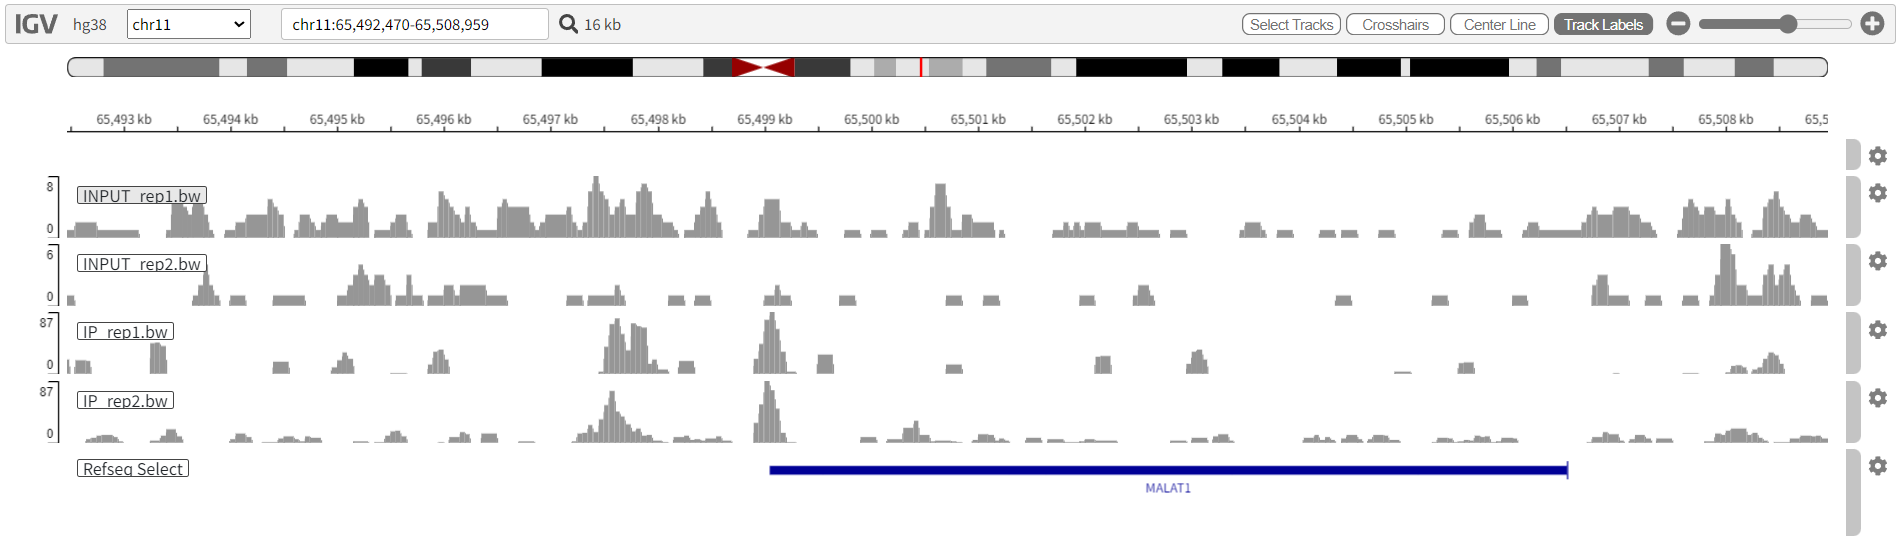

### NEAT1
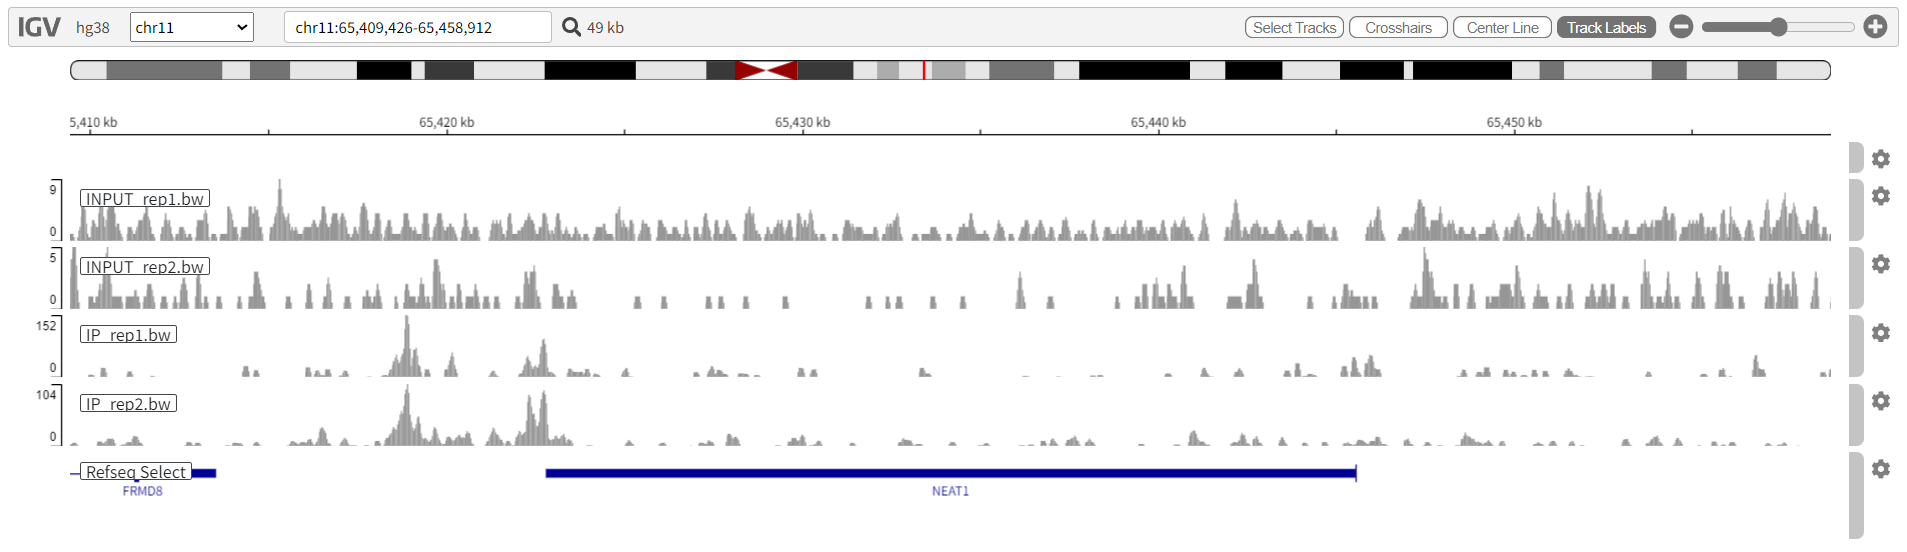

### Genomic Tracks

- **MALAT1:**  
  Multiple IP peaks were observed in both replicates, particularly upstream within intronic regions. Input signal appeared minimal across this locus.

- **NEAT1:**  
  A strong enrichment of RUNX1 signal was detected in both IP replicates relative to Input. Peaks were aligned with the RefSeq gene model of NEAT1.

### Peak Annotation and Overlap

According to the annotated peak dataset:
- **Statistically significant peaks** (MACS3 q-value < 0.01) were present within both MALAT1 and NEAT1 gene bodies.
- These peaks were retained in the **reproducible and filtered set** (IDR ≤ 0.05), supporting their classification as high-confidence RUNX1-bound regions.

These findings align with the conclusions of the original publication, which reported that **MALAT1** and **NEAT1** are direct transcriptional targets of RUNX1.

### Comparison with the Published Tracks

While the recreated tracks confirm RUNX1 binding at the same loci, several differences were observed between the generated and published figures:

| Aspect                     | Paper                  | Recreated Tracks           |
|----------------------------|------------------------|----------------------------|
| Genome build               | hg19                   | GRCh38                     |
| Signal scale               | ChIP: 0–30             | IP peaks reach ~150–180    |
| Input signal               | More suppressed        | Slightly elevated          |

#### Possible Explanations for Discrepancies

1. **Genome build differences (hg19 vs GRCh38)** may shift gene coordinates and influence peak overlap.
2. **Dynamic signal scaling in IGV** allows higher apparent peak heights, while the publication used a fixed y-axis scale (e.g., capped at 30), which improves visual contrast between conditions.
3. The original figure includes **RNA-seq signal tracks**, highlighting differential expression, whereas the recreated view focuses exclusively on ChIP-seq signal.

## Comparing key findings to the original paper

### Figure S2A

In [9]:
# Raw and mapped reads
pd.read_csv('samtools-flagstat-dp.tsv',sep='\t')

,Sample,Total Reads,Total Passed QC,Mapped,Duplicates,Paired in Sequencing,Properly Paired,Self and mate mapped,Singletons,Mate mapped to diff chr,Diff chr (mapQ >= 5)
INPUT_rep1_flagstat,30.041540,30.041540,28.870437,0,0,0,0,0,0,0,NaN
INPUT_rep2_flagstat,10.890224,10.890224,10.189399,0,0,0,0,0,0,0,NaN
IP_rep1_flagstat,29.050434,29.050434,28.098601,0,0,0,0,0,0,0,NaN
IP_rep2_flagstat,28.968174,28.968174,28.468440,0,0,0,0,0,0,0,NaN


### A. Table from the Publication
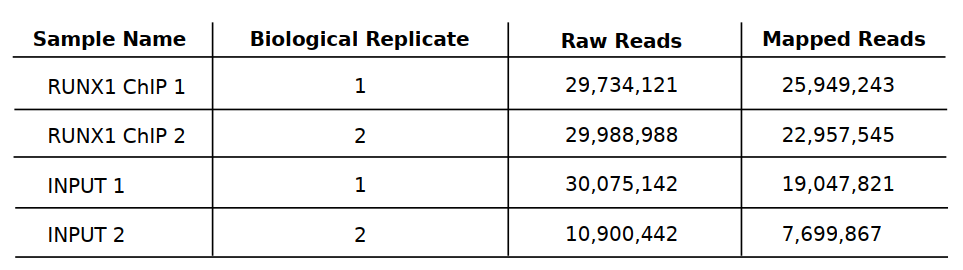

### B. Recreated Results (Millions of Reads)

| Sample Name     | Biological Replicate | Raw Reads (M) | Mapped Reads (M) |
|----------------|----------------------|----------------|------------------|
| RUNX1 ChIP 1    | 1                    | 29.05          | 28.10            |
| RUNX1 ChIP 2    | 2                    | 28.97          | 28.47            |
| INPUT 1         | 1                    | 30.04          | 28.87            |
| INPUT 2         | 2                    | 10.89          | 10.19            |

### Comparison

We observe **notable differences** between our mapped read counts and those reported in the paper:

- Our **mapped reads** are higher across all samples. For example, our RUNX1 ChIP 2 has 28.47M mapped reads compared to 22.96M in the paper.
- The most dramatic difference is in the INPUT samples, especially INPUT 1 (28.87M vs. 19.05M).

### Explanations:

1. **Alignment parameters** – The original study may have used more stringent alignment or filtering settings (e.g., only uniquely mapped reads), while our results include all mapped reads from `samtools flagstat`.

2. **Post-alignment filtering** – The paper may report **filtered** mapped reads (e.g., properly paired, mapQ > 30), whereas our stats reflect all that `samtools` considers “mapped.”

3. **Genome build or annotation differences** – Mapping to different builds (e.g., hg19 vs GRCh38) or inclusion of unplaced contigs may slightly alter mappability.

### Figure S2B

### Plot from the publication
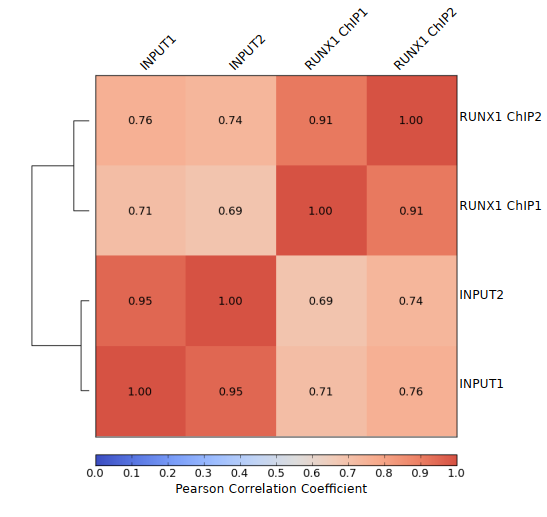

### Recreated plot
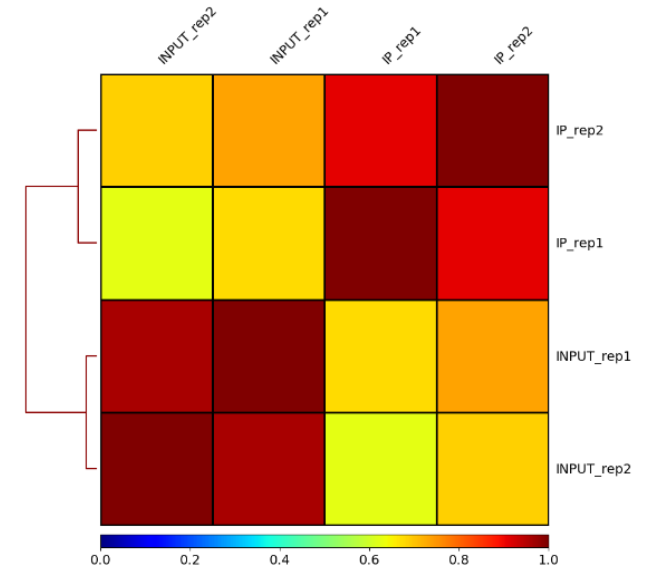

### Result from the publication

The paper presents a heatmap showing **Pearson correlation coefficients** between ChIP (RUNX1 IP) and input samples, based on genome-wide signal intensity. Key observations include:

- **High correlation between IP replicates**: RUNX1 ChIP1 and ChIP2 = **0.91**
- **High correlation between Input replicates**: INPUT1 and INPUT2 = **0.95**
- **Low correlation between IP and Input**: e.g., RUNX1 ChIP1 vs INPUT1 = **0.71**

This pattern supports **experimental specificity**, as replicates within the same group are highly consistent, while Input and IP samples remain clearly separated.

### Receated results

The recreated correlation heatmap also shows a comparable clustering pattern:

- **INPUT_rep1 and INPUT_rep2** have high correlation (**0.95**), consistent with the original figure.
- **IP_rep1 and IP_rep2** also correlate strongly (**~0.91**) with each other.
- **IP vs Input correlations are clearly lower**, especially between IP_rep1 and INPUT samples (~0.69–0.71), which supports successful IP signal separation.

However, some differences in absolute values and clustering strength are observed:
- The recreated matrix shows slightly higher overall correlation among all samples, possibly due to:
  1. **Normalization or binning differences** (e.g., fixed-bin `deeptools multiBigwigSummary` vs dynamic regions in paper)
  2. **Different genome builds or filtering criteria** used in signal processing

### Interpretation

The author’s takeaway of the figure is that **ChIP replicates correlate tightly**, and that **IP samples are clearly distinct from Inputs**, validating the experiment’s biological specificity.

The recreated results align with this conclusion:
- Both IP and Input replicates show strong intra-group reproducibility
- Inter-group differences (IP vs Input) are clearly distinguishable
- This supports the quality of ChIP enrichment and indicates that the experiment successfully captured RUNX1-specific chromatin interactions.

### Figure S2C

In [ ]:
import subprocess

files = [
    "/projectnb/bf528/materials/project-2-chipseq/refs/rep1_peaks.narrowPeak",
    "/projectnb/bf528/materials/project-2-chipseq/refs/rep2_peaks.narrowPeak",
    "/projectnb/bf528/students/vhe/project-2-VHE888/results/repr_peaks.bed",
    "/projectnb/bf528/students/vhe/project-2-VHE888/results/repr_peaks_filtered.bed",
]

for f in files:
    subprocess.run(["wc", "-l", f])

13161 /projectnb/bf528/materials/project-2-chipseq/refs/rep1_peaks.narrowPeak
17440 /projectnb/bf528/materials/project-2-chipseq/refs/rep2_peaks.narrowPeak
3349 /projectnb/bf528/students/vhe/project-2-VHE888/results/repr_peaks.bed
3026 /projectnb/bf528/students/vhe/project-2-VHE888/results/repr_peaks_filtered.bed


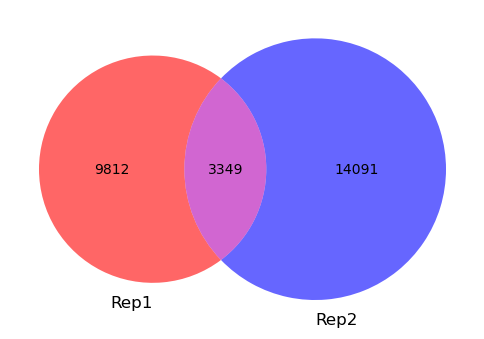

In [15]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Peak counts (from wc -l and IDR result)
rep1_total = 13161
rep2_total = 17440
shared = 3349  # from repr_peaks.bed

# Calculate unique peaks
rep1_unique = rep1_total - shared
rep2_unique = rep2_total - shared

# Plot
plt.figure(figsize=(6, 6))
venn = venn2(
    subsets=(rep1_unique, rep2_unique, shared),
    set_labels=("Rep1", "Rep2"),
    set_colors=("red", "blue"),
    alpha=0.6
)

# Annotate with exact counts
venn.get_label_by_id("10").set_text(str(rep1_unique))
venn.get_label_by_id("01").set_text(str(rep2_unique))
venn.get_label_by_id("11").set_text(str(shared))

### Plot from the publication
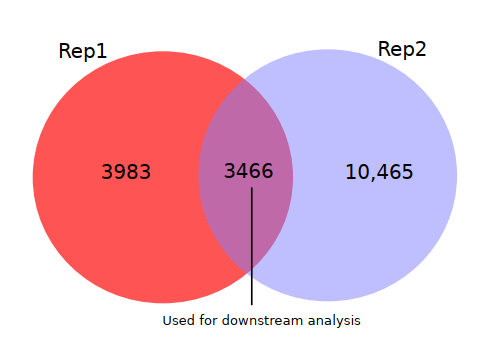

### Plot from the publication

The authors show a Venn diagram comparing called peaks between **Rep1** and **Rep2**.  
Their results:

- Rep1 unique peaks: **3983**
- Rep2 unique peaks: **10,465**
- Shared peaks (intersection): **3466**
- Shared peaks were used for downstream analysis

### The recreated Results

Using `wc -l` on the unfiltered peak and IDR output files, recreated results are:

| File | Peaks Count |
|------|-------------|
| `rep1_peaks.narrowPeak` | **13,161** |
| `rep2_peaks.narrowPeak` | **17,440** |
| `repr_peaks.bed`        | **3,349** (IDR reproducible) |
| `repr_peaks_filtered.bed` | **3,026** (final filtered set) |

This indicates:

- The recreated result have **more total peaks** per replicate than the paper reported.
- The **IDR reproducible peaks (~3349)** in new results are roughly in line with their shared peak number (3466).
- The resreated result **did not manually compute** the number of *unique* peaks per replicate (outside the intersection), but the higher raw counts suggest recreated Venn diagram would show **larger circles** and **similar overlap**.

### Differences & Explanations

There are **discrepancies in the number of called peaks** between recreated data and the figure in the paper:

#### 1. Different peak-calling thresholds
   - The paper used **MACS2 q < 0.01**, while recreated pipeline used **MACS3 q < 0.05**.

#### 2. Differences in sequencing depth and coverage
   - The new result's Rep2 has **17,440 peaks**, much higher than their 10,465 — likely due to **higher read depth** (as seen in the mapped reads comparison).
   - More reads allow detection of weaker enrichment regions, inflating peak counts.

#### 3. Genome build or annotation
   - If recreated used **GRCh38** and they used **hg19**, coordinate shifts and blacklist differences could affect peak locations and overlaps.

## Analyze the annotated peaks

### Methodology

To investigate the functional relevance of the RUNX1 ChIP-seq peaks, we focused on a subset of **differentially expressed genes** that are associated with peaks annotated as **promoter-TSS**.

Steps:

1. **Filter and extract gene list from annotated peaks**:
   We selected peaks overlapping promoters using the `Annotation` column (e.g., `"promoter-TSS"`), then extracted the corresponding gene symbols to a file named as de_promoters.txt.

2. **Submit gene list to Enrichr**:
   Go to: https://maayanlab.cloud/Enrichr/, upload or paste the de_promoters.txt file. Click Submit to run the enrichment. After analysis completes, the analysis results will be displayed, with enrichment libraries such as `ChEA 2022 (transcription factor targets)`, `ARCHS4 TFs Coexp`, and `ENCODE and ChEA Consensus TFs from`.

In [11]:
# Code for gene list extraction
de_promoters = de_peaks[de_peaks['Annotation'].str.contains('promoter-TSS')]['Gene Name'].tolist()

with open('de_promoters.txt', 'w') as w:
    w.write('\n'.join(de_promoters))

### The top results

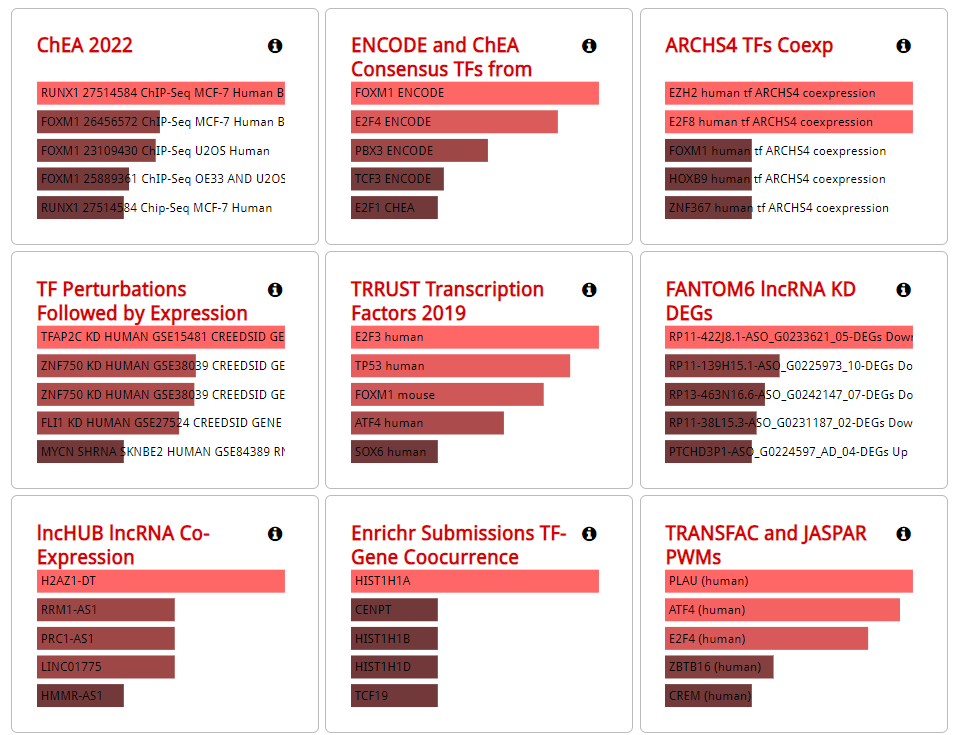

### Comments on the results
The enrichment analysis of RUNX1-bound promoter regions highlights **RUNX1 itself** as the most significantly enriched transcription factor, consistent with the ChIP-seq design and validating our peak annotation strategy. Interestingly, multiple other transcription factors such as **FOXM1**, **E2F1**, and **EZH2** also emerge across libraries including ChEA, ENCODE/ChEA Consensus, ARCHS4 coexpression, and TRRUST. These factors are known regulators of cell cycle progression, chromatin remodeling, and oncogenic signaling, suggesting that RUNX1 may operate within a broader transcriptional network controlling proliferation and epigenetic states. The co-occurrence of **E2F1** and **EZH2**, both associated with aggressive cancer phenotypes, raises the possibility that RUNX1-bound genes may overlap with proliferative or stem-like transcriptional programs. These findings motivate further investigation into RUNX1’s functional interplay with these factors in breast cancer models.
